The raw data of dwelling lifetime is not cleaned even though it also contain year 2051-2100.
The standard deviation for 1600-1799 is modelled with regression and merged into the data.
The same is done for average lifetime. The trend was linear for the raw data and therefore linear regression was chosen.

The linear relationship can be expressed with this function (from warm_up_15):

\begin{equation}
    \textbf{Y} = \beta \textbf{X}+ \epsilon
\end{equation}

To do the regression B must be found.

In [1]:
# All imports
import numpy as np
import pandas as pd
import matplotlib as plt
from scipy.stats import norm #for normal distribution
import statsmodels.api as sm #for linear regression
import matplotlib.pyplot as plt
import math as ma

import os
from pathlib import Path
import copy
import matplotlib.pyplot as plt
from datetime import datetime
import sys
from scipy.optimize import curve_fit

In [2]:
#* Define paths
directory_path = Path('../../../')

In [3]:
# getting the name of the directory where the this file is present.
current = os.path.dirname(os.path.realpath('this'))
 
# Getting the parent directory name where the current directory is present.
parent = os.path.dirname(current)
#make the UA path
module_path = parent + '/modules'
#append path to options to import from
sys.path.append(module_path)


In [4]:

# File path
file = "raw_dwelling_lifetime.xlsx" #only works if the file is in the same folder

# Read the Excel file
raw_data = pd.read_excel(file, header=0)

new_header = ['year', 'lifetime', 'std_dev'] # Assigning new names to the header
raw_data.columns = new_header

# defining the parameters as np.arrays
year = np.array(raw_data.year)
lifetime = np.array(raw_data.lifetime)
std_dev = np.array(raw_data.std_dev)

# Display the DataFrame with updated column names
print(raw_data)

     year    lifetime   std_dev
0    1800  150.000000  0.300000
1    1801  149.816667  0.299667
2    1802  149.633333  0.299333
3    1803  149.450000  0.299000
4    1804  149.266667  0.298667
..    ...         ...       ...
296  2096   95.733333  0.201333
297  2097   95.550000  0.201000
298  2098   95.366667  0.200667
299  2099   95.183333  0.200333
300  2100   95.000000  0.200000

[301 rows x 3 columns]


In [5]:
#Plot of the raw data for standard deviation without regression
'''plt.figure(figsize=(16,10))
plt.plot(year, std_dev, color = 'black', markersize = 5, label = f'Raw data for standard deviation')
plt.xlabel('Year')
plt.ylabel('Standard deviation')
plt.title('Raw data Standard deviation - visualization')
plt.legend(loc = 'best')
plt.show()'''

"plt.figure(figsize=(16,10))\nplt.plot(year, std_dev, color = 'black', markersize = 5, label = f'Raw data for standard deviation')\nplt.xlabel('Year')\nplt.ylabel('Standard deviation')\nplt.title('Raw data Standard deviation - visualization')\nplt.legend(loc = 'best')\nplt.show()"

Regression for standard deviation 1600-1800 (linear):

The linear model our fit created is  
-0.0003333 x + 0.9.


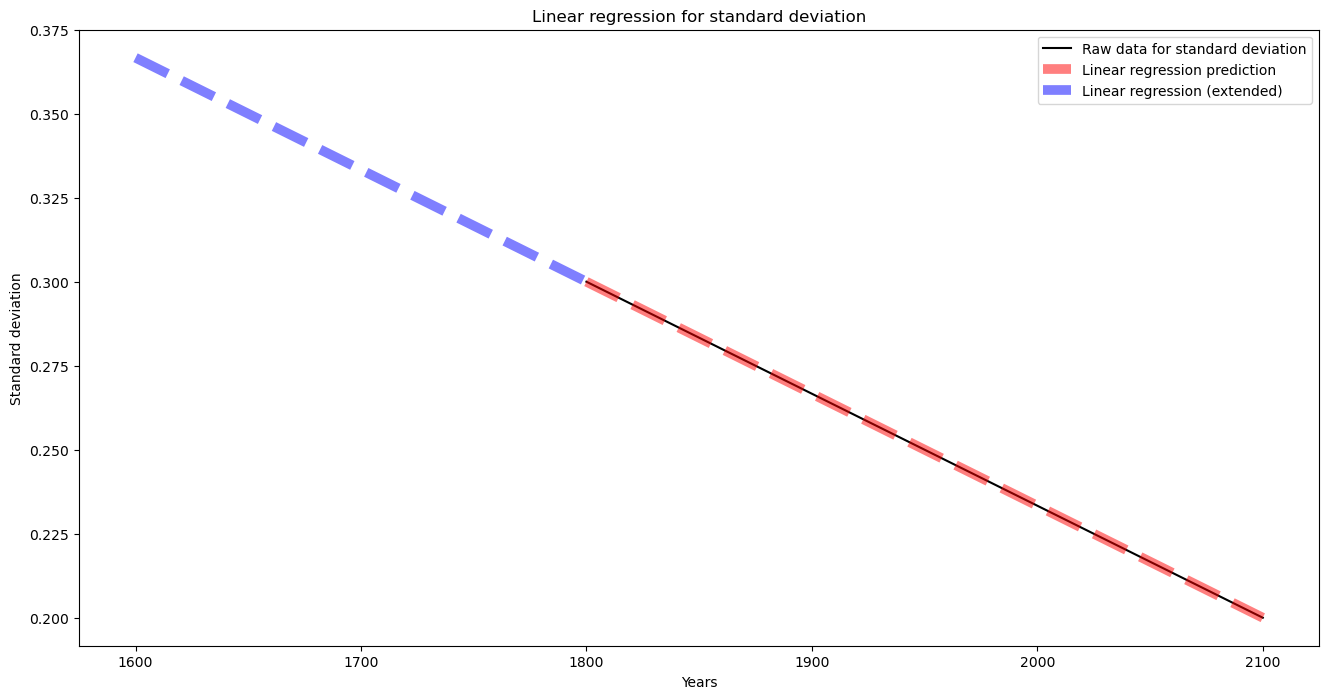

In [6]:
# Perform regression and find beta:
linear_model_std_dev = np.poly1d(np.polyfit(year, std_dev, 1))
print(f'The linear model our fit created is {linear_model_std_dev}.')

# Apply to extended values
lin_reg_std_dev = linear_model_std_dev(year)

# Plot raw data and linear regression for the original range
fig = plt.figure(figsize=(16, 8))
plt.plot(year, std_dev, color='black', markersize=5, label='Raw data for standard deviation')
plt.plot(year, lin_reg_std_dev, '--', lw=7, alpha=0.5, color='red', label='Linear regression prediction')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Standard deviation')
plt.title('Linear regression for standard deviation')

# Add the years 1600-1799 and the regression values
reg_years = np.arange(1600, 1800)
lin_reg_std_dev = linear_model_std_dev(reg_years)

# Plot linear regression for the extended range on the same plot
plt.plot(reg_years, lin_reg_std_dev, '--', lw=7, alpha=0.5, color='blue', label='Linear regression (extended)')
plt.legend(loc='best')

plt.show()


In [7]:
#Plot of the raw data for lifetime without regression
'''plt.figure(figsize=(16,10))
plt.plot(year, lifetime, color = 'black', markersize = 5, label = f'Raw data for lifetime')
plt.xlabel('Year')
plt.ylabel('Lifetime')
plt.title('Raw data Lifetime - visualization')
plt.legend(loc = 'best')
plt.show()'''

"plt.figure(figsize=(16,10))\nplt.plot(year, lifetime, color = 'black', markersize = 5, label = f'Raw data for lifetime')\nplt.xlabel('Year')\nplt.ylabel('Lifetime')\nplt.title('Raw data Lifetime - visualization')\nplt.legend(loc = 'best')\nplt.show()"

Regression for lifetime 1600-1800 (linear):

The linear model our fit created is  
-0.1833 x + 480.


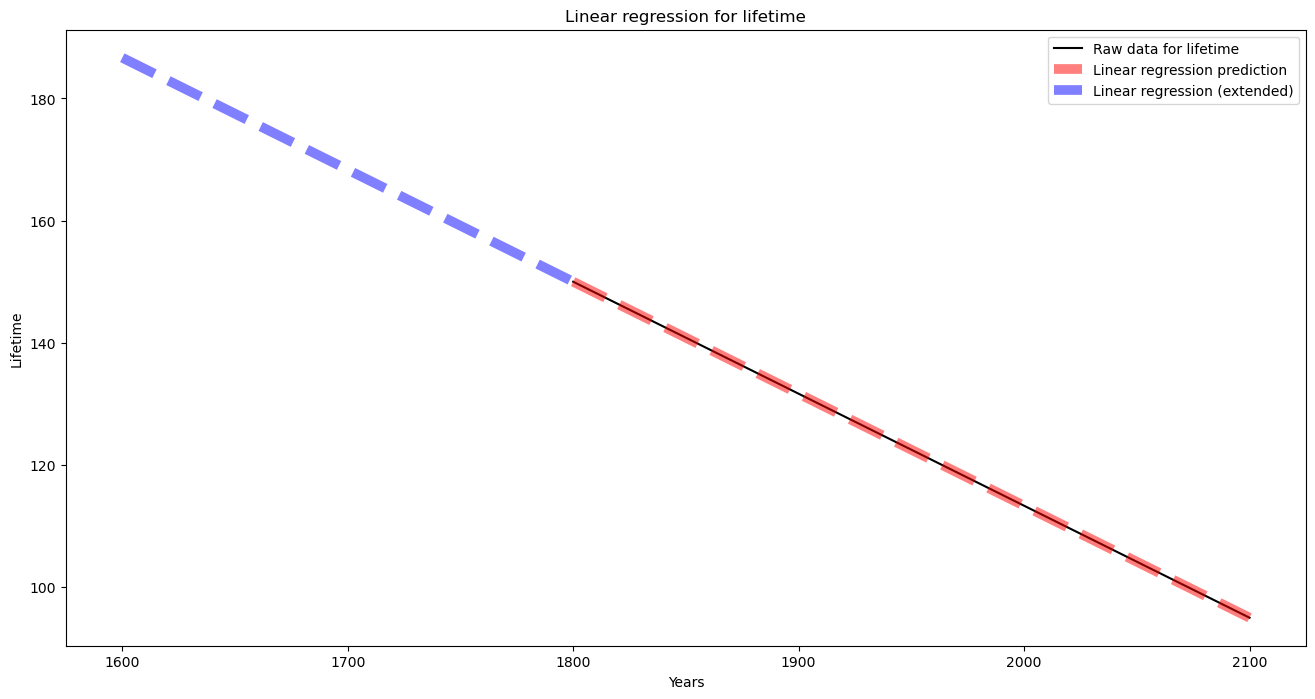

In [8]:
# Perform regression and find beta:
linear_model_lifetime = np.poly1d(np.polyfit(year, lifetime, 1))
print(f'The linear model our fit created is {linear_model_lifetime}.')

# Apply to extended values
lin_reg_lifetime = linear_model_lifetime(year)

# Plot raw data and linear regression for the original range
fig = plt.figure(figsize=(16, 8))
plt.plot(year, lifetime, color='black', markersize=5, label='Raw data for lifetime')
plt.plot(year, lin_reg_lifetime, '--', lw=7, alpha=0.5, color='red', label='Linear regression prediction')
plt.legend(loc='best')
plt.xlabel('Years')
plt.ylabel('Lifetime')
plt.title('Linear regression for lifetime')

# Add the years 1600-1799 and the regression values
reg_years = np.arange(1600, 1800)
lin_reg_lifetime= linear_model_lifetime(reg_years)

# Plot linear regression for the extended range on the same plot
plt.plot(reg_years, lin_reg_lifetime, '--', lw=7, alpha=0.5, color='blue', label='Linear regression (extended)')
plt.legend(loc='best')

plt.show()


Save and combine the new values with the raw data in a new dataframe:

In [9]:
# Create a combined DataFrame for all values
extended_data = pd.DataFrame({
    'year': reg_years,
    'lifetime': lin_reg_lifetime,
    'std_dev': lin_reg_std_dev
})

# Concatenate the original DataFrame with the extended DataFrame
combined_data = pd.concat([extended_data, raw_data], ignore_index=True)

# Display the combined_data DataFrame
#print(extended_data)
print(combined_data)

     year    lifetime   std_dev
0    1600  186.666667  0.366667
1    1601  186.483333  0.366333
2    1602  186.300000  0.366000
3    1603  186.116667  0.365667
4    1604  185.933333  0.365333
..    ...         ...       ...
496  2096   95.733333  0.201333
497  2097   95.550000  0.201000
498  2098   95.366667  0.200667
499  2099   95.183333  0.200333
500  2100   95.000000  0.200000

[501 rows x 3 columns]


In [10]:
# Save the merged dataframe to a new Excel file
combined_data.to_excel(directory_path / 
                 'Data/regression_data/Dwelling_Lifetime/regression_Dwelling_Lifetime.xlsx')

#excel_filename = 'regression_Dwelling_Lifetime.xlsx'
#combined_data.to_excel(excel_filename, index=False)

In [11]:
print(directory_path)

..\..\..
